In [1]:
import re
import pandas as pd

In [2]:
f=open('whatsapp-chat-data.txt', 'r', encoding='utf-8')

In [3]:
data=f.read()

In [4]:
print(data)

26/01/2020, 4:19 pm - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
24/01/2020, 8:25 pm - Tanay Kamath (TSEC, CS) created group "CODERS👨‍💻👩‍💻🖥💻"
26/01/2020, 4:19 pm - You joined using this group's invite link
26/01/2020, 4:20 pm - +91 99871 38558 joined using this group's invite link
26/01/2020, 4:20 pm - +91 91680 38866 joined using this group's invite link
26/01/2020, 4:22 pm - +91 72762 35231 joined using this group's invite link
26/01/2020, 4:22 pm - +91 88392 06534 joined using this group's invite link
26/01/2020, 4:23 pm - +91 98709 38217 joined using this group's invite link
26/01/2020, 4:23 pm - +91 98702 02065 joined using this group's invite link
26/01/2020, 4:23 pm - +91 91370 44426 joined using this group's invite link
26/01/2020, 4:25 pm - +91 86559 19035 joined using this group's invite link
26/01/2020, 4:25 pm - +91 79778 39093 joined using this group's invite link
26/01/2020, 4

In [5]:
pattern = r'\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s[APMapm]{2}\s-\s'

In [6]:
messages=re.split(pattern, data)[1:]
messages

['Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n',
 'Tanay Kamath (TSEC, CS) created group "CODERS👨\u200d💻👩\u200d💻🖥💻"\n',
 "You joined using this group's invite link\n",
 "+91 99871 38558 joined using this group's invite link\n",
 "+91 91680 38866 joined using this group's invite link\n",
 "+91 72762 35231 joined using this group's invite link\n",
 "+91 88392 06534 joined using this group's invite link\n",
 "+91 98709 38217 joined using this group's invite link\n",
 "+91 98702 02065 joined using this group's invite link\n",
 "+91 91370 44426 joined using this group's invite link\n",
 "+91 86559 19035 joined using this group's invite link\n",
 "+91 79778 39093 joined using this group's invite link\n",
 "+91 98670 44401 joined using this group's invite link\n",
 "+91 84828 26061 joined using this group's invite link\n",
 "+91 96191 55044 joined using this group's invite link\n",
 "+91 99201 758

In [7]:
dates=re.findall(pattern, data)
dates

['26/01/2020, 4:19 pm - ',
 '24/01/2020, 8:25 pm - ',
 '26/01/2020, 4:19 pm - ',
 '26/01/2020, 4:20 pm - ',
 '26/01/2020, 4:20 pm - ',
 '26/01/2020, 4:22 pm - ',
 '26/01/2020, 4:22 pm - ',
 '26/01/2020, 4:23 pm - ',
 '26/01/2020, 4:23 pm - ',
 '26/01/2020, 4:23 pm - ',
 '26/01/2020, 4:25 pm - ',
 '26/01/2020, 4:25 pm - ',
 '26/01/2020, 4:25 pm - ',
 '26/01/2020, 4:26 pm - ',
 '26/01/2020, 4:26 pm - ',
 '26/01/2020, 4:26 pm - ',
 '26/01/2020, 4:29 pm - ',
 '26/01/2020, 4:29 pm - ',
 '26/01/2020, 4:30 pm - ',
 '26/01/2020, 4:31 pm - ',
 '26/01/2020, 4:32 pm - ',
 '26/01/2020, 4:36 pm - ',
 '26/01/2020, 4:37 pm - ',
 '26/01/2020, 4:38 pm - ',
 '26/01/2020, 4:39 pm - ',
 '26/01/2020, 4:39 pm - ',
 '26/01/2020, 4:45 pm - ',
 '26/01/2020, 4:46 pm - ',
 '26/01/2020, 4:47 pm - ',
 '26/01/2020, 4:49 pm - ',
 '26/01/2020, 4:51 pm - ',
 '26/01/2020, 4:53 pm - ',
 '26/01/2020, 4:57 pm - ',
 '26/01/2020, 4:58 pm - ',
 '26/01/2020, 5:00 pm - ',
 '26/01/2020, 5:01 pm - ',
 '26/01/2020, 5:02 pm - ',
 

In [8]:
df = pd.DataFrame({'user_message': messages, 'message_date': dates})
# convert message_date type
df['message_date'] = pd.to_datetime(df['message_date'], format='%d/%m/%Y, %I:%M %p - ')
df.rename(columns={'message_date': 'date'}, inplace=True)
df.head()

,user_message,date
0,Messages and calls are end-to-end encrypted. N...,2020-01-26 16:19:00
1,"Tanay Kamath (TSEC, CS) created group ""CODERS👨...",2020-01-24 20:25:00
2,You joined using this group's invite link\n,2020-01-26 16:19:00
3,+91 99871 38558 joined using this group's invi...,2020-01-26 16:20:00
4,+91 91680 38866 joined using this group's invi...,2020-01-26 16:20:00


In [9]:
df.shape

(13655, 2)

In [10]:
pattern = "(joined using this group's invite link)"

# Use boolean indexing to drop rows containing the specified pattern
df.drop(df[df['user_message'].str.contains(pattern)].index, inplace=True)

# Display the resulting DataFrame without the specified pattern
df.head()

C:\Users\suraj\AppData\Local\Temp\ipykernel_13980\2653296555.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df.drop(df[df['user_message'].str.contains(pattern)].index, inplace=True)


,user_message,date
0,Messages and calls are end-to-end encrypted. N...,2020-01-26 16:19:00
1,"Tanay Kamath (TSEC, CS) created group ""CODERS👨...",2020-01-24 20:25:00
46,"+91 96536 93868 removed Saket (TSEC, CS)\n",2020-01-26 17:12:00
48,"+91 96536 93868 added Saket (TSEC, CS)\n",2020-01-26 17:13:00
51,+91 96536 93868 left\n,2020-01-26 17:20:00


In [11]:
df.shape

(13502, 2)

In [12]:
users = []
messages = []
for message in df['user_message']:
    entry = re.split('([\w\W]+?):\s', message)
    if entry[1:]:  # user name
        users.append(entry[1])
        messages.append(" ".join(entry[2:]))
    else:
        users.append('group_notification')
        messages.append(entry[0])

df['user'] = users
df['message'] = messages
df.drop(columns=['user_message'], inplace=True)
df.head()

,date,user,message
0,2020-01-26 16:19:00,group_notification,Messages and calls are end-to-end encrypted. N...
1,2020-01-24 20:25:00,group_notification,"Tanay Kamath (TSEC, CS) created group ""CODERS👨..."
46,2020-01-26 17:12:00,group_notification,"+91 96536 93868 removed Saket (TSEC, CS)\n"
48,2020-01-26 17:13:00,group_notification,"+91 96536 93868 added Saket (TSEC, CS)\n"
51,2020-01-26 17:20:00,group_notification,+91 96536 93868 left\n


In [13]:
df = df.reset_index(drop=True)
df.head()

,date,user,message
0,2020-01-26 16:19:00,group_notification,Messages and calls are end-to-end encrypted. N...
1,2020-01-24 20:25:00,group_notification,"Tanay Kamath (TSEC, CS) created group ""CODERS👨..."
2,2020-01-26 17:12:00,group_notification,"+91 96536 93868 removed Saket (TSEC, CS)\n"
3,2020-01-26 17:13:00,group_notification,"+91 96536 93868 added Saket (TSEC, CS)\n"
4,2020-01-26 17:20:00,group_notification,+91 96536 93868 left\n


In [14]:
df['user'].count

<bound method Series.count of 0                group_notification
1                group_notification
2                group_notification
3                group_notification
4                group_notification
                    ...            
13497     Darshan Rander (TSEC, IT)
13498     Darshan Rander (TSEC, IT)
13499       Tanay Kamath (TSEC, CS)
13500     Darshan Rander (TSEC, IT)
13501    Dheeraj Lalwani (TSEC, CS)
Name: user, Length: 13502, dtype: object>

In [15]:
df['only_date'] = df['date'].dt.date
df['year'] = df['date'].dt.year
df['month_num'] = df['date'].dt.month
df['month'] = df['date'].dt.month_name()
df['day'] = df['date'].dt.day
df['day_name'] = df['date'].dt.day_name()
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute
df.head()

,date,user,message,only_date,year,month_num,month,day,day_name,hour,minute
0,2020-01-26 16:19:00,group_notification,Messages and calls are end-to-end encrypted. N...,2020-01-26,2020,1,January,26,Sunday,16,19
1,2020-01-24 20:25:00,group_notification,"Tanay Kamath (TSEC, CS) created group ""CODERS👨...",2020-01-24,2020,1,January,24,Friday,20,25
2,2020-01-26 17:12:00,group_notification,"+91 96536 93868 removed Saket (TSEC, CS)\n",2020-01-26,2020,1,January,26,Sunday,17,12
3,2020-01-26 17:13:00,group_notification,"+91 96536 93868 added Saket (TSEC, CS)\n",2020-01-26,2020,1,January,26,Sunday,17,13
4,2020-01-26 17:20:00,group_notification,+91 96536 93868 left\n,2020-01-26,2020,1,January,26,Sunday,17,20


In [16]:
df[df['user']=='Darshan Rander (TSEC, IT)'].shape

(1404, 11)

In [17]:
for message in df['message']:
    print(message.split())

['Messages', 'and', 'calls', 'are', 'end-to-end', 'encrypted.', 'No', 'one', 'outside', 'of', 'this', 'chat,', 'not', 'even', 'WhatsApp,', 'can', 'read', 'or', 'listen', 'to', 'them.', 'Tap', 'to', 'learn', 'more.']
['Tanay', 'Kamath', '(TSEC,', 'CS)', 'created', 'group', '"CODERS👨\u200d💻👩\u200d💻🖥💻"']
['+91', '96536', '93868', 'removed', 'Saket', '(TSEC,', 'CS)']
['+91', '96536', '93868', 'added', 'Saket', '(TSEC,', 'CS)']
['+91', '96536', '93868', 'left']
['Prithvi', 'Rohira', '(TSEC,', 'CS)', 'left']
['<Media', 'omitted>']
['Give', 'it', 'a', 'try', '....']
['Alright']
['We', 'can', 'make', 'this', 'a', 'trend']
['Sure']
['Everyday', 'a', 'new', 'challenge']
['More', 'of', 'logic', 'or', 'algo', 'problems^']
['Yeah']
['Something', 'or', 'the', 'other', 'So', 'that', 'we', 'can', 'build', 'our', 'problem', 'solving', 'skills']
['Nice', 'idea', '🤟']
['Dheeraj', 'Lalwani', '(TSEC,', 'CS)', 'changed', 'the', 'subject', 'from', '"CODERS👨\u200d💻👩\u200d💻🖥💻"', 'to', '"TSEC', 'CODERS👨\u200d💻👩

In [18]:
words=[]
for message in df['message']:
    words.extend(message.split())

In [19]:
len(words)

102981

In [20]:
df[df['message']=='<Media omitted>\n']

,date,user,message,only_date,year,month_num,month,day,day_name,hour,minute
6,2020-01-27 19:31:00,+91 96536 93868,<Media omitted>\n,2020-01-27,2020,1,January,27,Monday,19,31
34,2020-01-27 22:00:00,"Dheeraj Lalwani (TSEC, CS)",<Media omitted>\n,2020-01-27,2020,1,January,27,Monday,22,0
45,2020-01-27 22:09:00,"Rohit Pathak (TSEC, CS)",<Media omitted>\n,2020-01-27,2020,1,January,27,Monday,22,9
50,2020-01-27 22:10:00,+91 75078 05454,<Media omitted>\n,2020-01-27,2020,1,January,27,Monday,22,10
59,2020-01-27 22:16:00,"Tanay Kamath (TSEC, CS)",<Media omitted>\n,2020-01-27,2020,1,January,27,Monday,22,16
...,...,...,...,...,...,...,...,...,...,...,...
13423,2020-10-01 09:26:00,"Dheeraj Lalwani (TSEC, CS)",<Media omitted>\n,2020-10-01,2020,10,October,1,Thursday,9,26
13428,2020-10-01 10:05:00,Tushar Nankani,<Media omitted>\n,2020-10-01,2020,10,October,1,Thursday,10,5
13433,2020-10-01 10:42:00,+91 70219 80066,<Media omitted>\n,2020-10-01,2020,10,October,1,Thursday,10,42
13476,2020-10-01 15:29:00,"Shubham Chettiar (TSEC CS, TE)",<Media omitted>\n,2020-10-01,2020,10,October,1,Thursday,15,29


In [21]:
from urlextract import URLExtract

extractor=URLExtract()
urls=extractor.find_urls("Let's go to www.gmail.com and add it to the stackoverflow.com")
urls

['www.gmail.com', 'stackoverflow.com']

In [22]:
links=[]
for message in df['message']:
    links.extend(extractor.find_urls(message))

In [23]:
len(links)

1053

In [24]:
links

['https://youtu.be/AU7mADJMa9Y',
 'https://youtu.be/aZu084TPInE',
 'http://meetu.ps/e/HKD5Q/BGt8n/d',
 'https://www.youtube.com/watch?v=fUqpYvIYj-Y',
 'https://www.youtube.com/playlist?list=PLDN4rrl48XKpZkf03iYFl-O29szjTrs_O',
 'https://repl.it/repls/AmusingPungentComputation',
 'https://youtu.be/4eWKHLSRHPY',
 'https://research.hackerrank.com/developer-skills/2020?utm_medium=social&utm_source=instagram&utm_campaign=021420&utm_content=IGPoll',
 'https://forms.gle/27DSsnJnBBMRy6Bt8',
 'https://code.dcoder.tech/files/code/5e3d7fad3975f256bf9d10e8/practice',
 'https://code.dcoder.tech/files/code/5e4a61595e611d351827daec/hell',
 'https://code.dcoder.tech/files/code/5e4c15209e436e412f89d805/right-angled-triangle',
 'https://forms.gle/Ui2Fb4BF2FTW5fhZA',
 'https://pastebin.com/cm0Y3fYv',
 'https://www.codechef.com/icpc',
 'https://chat.whatsapp.com/EbekhvkeUPcJYvfUs4M4js',
 'https://forms.gle/FofR6NiHHgkfL4ow7',
 'https://m.facebook.com/djsce.codestars',
 'https://www.instagram.com/djsce.cod

In [25]:
x=df['user'].value_counts().head()

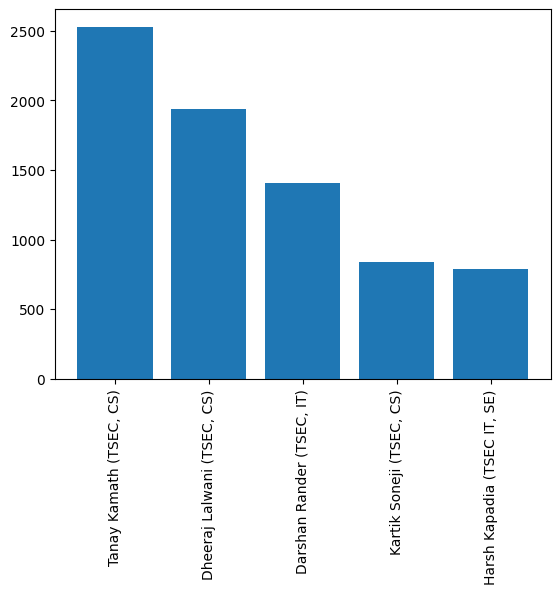

In [26]:
import matplotlib.pyplot as plt
name=x.index
count=x.values
plt.bar(name,count)
plt.xticks(rotation='vertical')
plt.show()

In [27]:
((df['user'].value_counts()/df.shape[0])*100).reset_index().rename(columns={'index':'Name', 'user':'Percent'})

,Name,Percent
0,"Tanay Kamath (TSEC, CS)",18.723152
1,"Dheeraj Lalwani (TSEC, CS)",14.346023
2,"Darshan Rander (TSEC, IT)",10.398459
3,"Kartik Soneji (TSEC, CS)",6.228707
4,"Harsh Kapadia (TSEC IT, SE)",5.850985
...,...,...
150,+91 82080 03744,0.007406
151,+91 97698 67348,0.007406
152,+91 76663 28147,0.007406
153,+91 96194 00980,0.007406


In [28]:
from wordcloud import WordCloud
wc=WordCloud(width=500, height=500, min_font_size=10, background_color='white')
wc.generate(df['message'].str.cat(sep=" "))

ValueError: Only supported for TrueType fonts

In [29]:
temp=df[df['user']!='group_notification']
temp=temp[temp['message']!='<Media omitted>\n']

In [30]:
f = open('stop_hinglish.txt', 'r')
stop_words = f.read()
print(stop_words)

.
..
...
?
-
--
1
2
3
4
5
6
7
8
9
0
a
aadi
aaj
aap
aapne
aata
aati
aaya
aaye
ab
abbe
abbey
abe
abhi
able
about
above
accha
according
accordingly
acha
achcha
across
actually
after
afterwards
again
against
agar
ain
aint
ain't
aisa
aise
aisi
alag
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
andar
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
ap
apan
apart
apna
apnaa
apne
apni
appear
are
aren
arent
aren't
around
arre
as
aside
ask
asking
at
aur
avum
aya
aye
baad
baar
bad
bahut
bana
banae
banai
banao
banaya
banaye
banayi
banda
bande
bandi
bane
bani
bas
bata
batao
bc
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
below
beside
besides
best
better
between
beyond
bhai
bheetar
bhi
bhitar
bht
bilkul
bohot
bol
bola
bole
boli
bolo
bolta
bolte
bolti
both
brief
bro
btw
but
by
came
can
cannot
cant
can't
cause
causes
certain
certainly
chahiye
chaiye
chal
chalega
chhaiye
clearly
c'mon
com
come
comes
could
coul

In [31]:
words=[]
for message in temp['message']:
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)

In [32]:
words

['....',
 'alright',
 'make',
 'trend',
 'everyday',
 'challenge',
 'logic',
 'algo',
 'problems^',
 'build',
 'problem',
 'solving',
 'skills',
 'nice',
 'idea',
 '🤟',
 'posting',
 'codes',
 '10',
 'pm',
 'alright',
 'note',
 'genuinely',
 'interested',
 'coding',
 'start',
 'coding',
 'group',
 'store',
 '*',
 'char',
 'variable?',
 'printing',
 'pattern😂',
 'ofc',
 'store',
 'variable',
 'ohk',
 'printf("*");',
 'cool',
 'soln',
 'python',
 'bruh😑',
 'check',
 'correct',
 'hua?',
 'yeah👍👌',
 'solution',
 'language',
 '??',
 'learning',
 'message',
 'deleted',
 'alright',
 'actually,',
 'lazy',
 'syntax',
 'strong',
 'hai😅😂',
 'message',
 'deleted',
 'soln',
 'main()',
 '{',
 'n;',
 'cin>>n;',
 '(int',
 'i=1;i<=n;i++){',
 'for(int',
 'j=1;j<=n+1-i;j++){',
 'cout<<"*";',
 '}',
 '(int',
 'k=1;k<=2*i-2;k++){',
 'cout<<"',
 '";',
 '}',
 'for(int',
 'j=1;j<=n+1-i;j++){',
 'cout<<"*";',
 '}cout<<endl;',
 '}',
 'for(int',
 'i=1;i<=n;i++){',
 'for(int',
 'j=1;j<=i;j++){',
 'cout<<"*";',
 '}'

In [33]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,😂,391
1,message,344
2,deleted,332
3,},324
4,=,315
5,{,252
6,codeforces,241
7,😂😂,231
8,handle,215
9,append,215


In [34]:
import emoji

In [39]:
emojis = []
for message in df['message']:
    emojis.extend([c for c in message if emoji.emoji_count(c) > 0])

In [41]:
emoji_df=pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

In [42]:
emoji_df

,0,1
0,😂,1896
1,👍,365
2,🏻,336
3,🔥,254
4,😅,224
...,...,...
220,⚙,1
221,🌝,1
222,🕜,1
223,▶,1


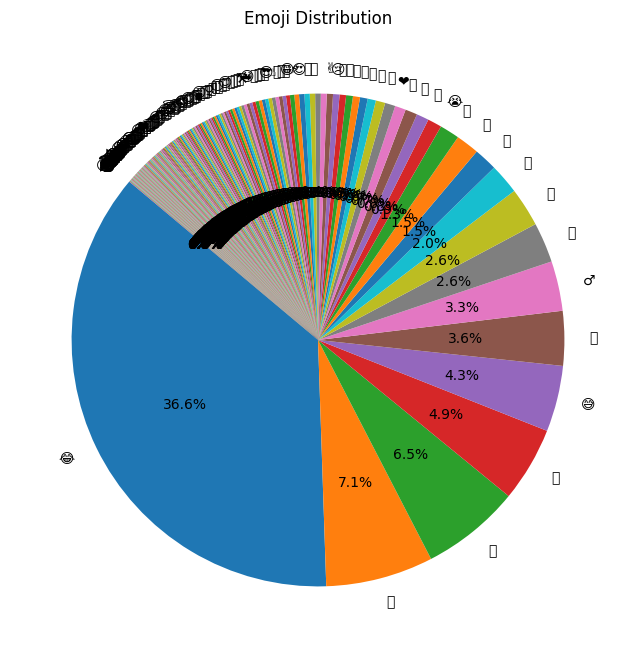

In [44]:
plt.figure(figsize=(8, 8))
plt.pie(emoji_df[1], labels=emoji_df[0], autopct='%1.1f%%', startangle=140)
plt.title('Emoji Distribution')
plt.show()

<BarContainer object of 5 artists>

C:\Users\suraj\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\suraj\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 127995 (\N{EMOJI MODIFIER FITZPATRICK TYPE-1-2}) missing from current font.
  func(*args, **kwargs)
C:\Users\suraj\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  func(*args, **kwargs)
C:\Users\suraj\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\suraj\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127995 (\N{EMOJI MODIFIER FITZPATRICK TYPE-1-2}) missin

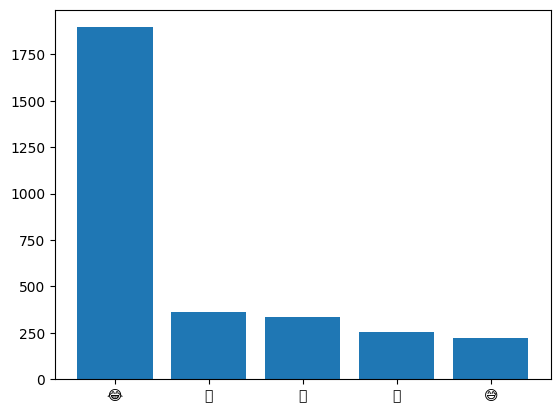

In [45]:
plt.bar(emoji_df[0].head(), emoji_df[1].head())

In [46]:
df

,date,user,message,only_date,year,month_num,month,day,day_name,hour,minute
0,2020-01-26 16:19:00,group_notification,Messages and calls are end-to-end encrypted. N...,2020-01-26,2020,1,January,26,Sunday,16,19
1,2020-01-24 20:25:00,group_notification,"Tanay Kamath (TSEC, CS) created group ""CODERS👨...",2020-01-24,2020,1,January,24,Friday,20,25
2,2020-01-26 17:12:00,group_notification,"+91 96536 93868 removed Saket (TSEC, CS)\n",2020-01-26,2020,1,January,26,Sunday,17,12
3,2020-01-26 17:13:00,group_notification,"+91 96536 93868 added Saket (TSEC, CS)\n",2020-01-26,2020,1,January,26,Sunday,17,13
4,2020-01-26 17:20:00,group_notification,+91 96536 93868 left\n,2020-01-26,2020,1,January,26,Sunday,17,20
...,...,...,...,...,...,...,...,...,...,...,...
13497,2020-10-02 02:05:00,"Darshan Rander (TSEC, IT)",MCQs mark kiya\n,2020-10-02,2020,10,October,2,Friday,2,5
13498,2020-10-02 02:05:00,"Darshan Rander (TSEC, IT)",Sign-in kiya😂😅\n,2020-10-02,2020,10,October,2,Friday,2,5
13499,2020-10-02 02:11:00,"Tanay Kamath (TSEC, CS)",Incognito se na?\n,2020-10-02,2020,10,October,2,Friday,2,11
13500,2020-10-02 02:28:00,"Darshan Rander (TSEC, IT)",Yup\n,2020-10-02,2020,10,October,2,Friday,2,28


In [48]:
timeline=df.groupby(['year','month_num','month']).count()['message'].reset_index()
timeline

,year,month_num,month,message
0,2020,1,January,359
1,2020,2,February,2017
2,2020,3,March,1765
3,2020,4,April,1264
4,2020,5,May,1295
5,2020,6,June,1434
6,2020,7,July,998
7,2020,8,August,1725
8,2020,9,September,2532
9,2020,10,October,113


In [49]:
time=[]
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i]+"-"+str(timeline['year'][i]))

In [50]:
timeline['time']=time
timeline

,year,month_num,month,message,time
0,2020,1,January,359,January-2020
1,2020,2,February,2017,February-2020
2,2020,3,March,1765,March-2020
3,2020,4,April,1264,April-2020
4,2020,5,May,1295,May-2020
5,2020,6,June,1434,June-2020
6,2020,7,July,998,July-2020
7,2020,8,August,1725,August-2020
8,2020,9,September,2532,September-2020
9,2020,10,October,113,October-2020


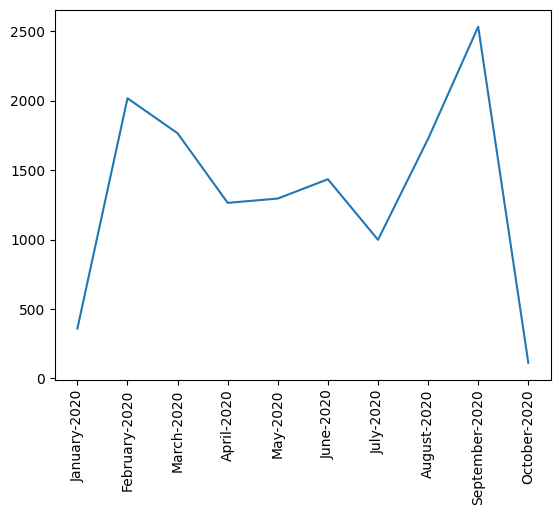

In [51]:
plt.plot(timeline['time'], timeline['message'])
plt.xticks(rotation='vertical')
plt.show()

In [52]:
df['only_date']=df['date'].dt.date

In [53]:
daily_timeline=df.groupby('only_date').count()['message'].reset_index()

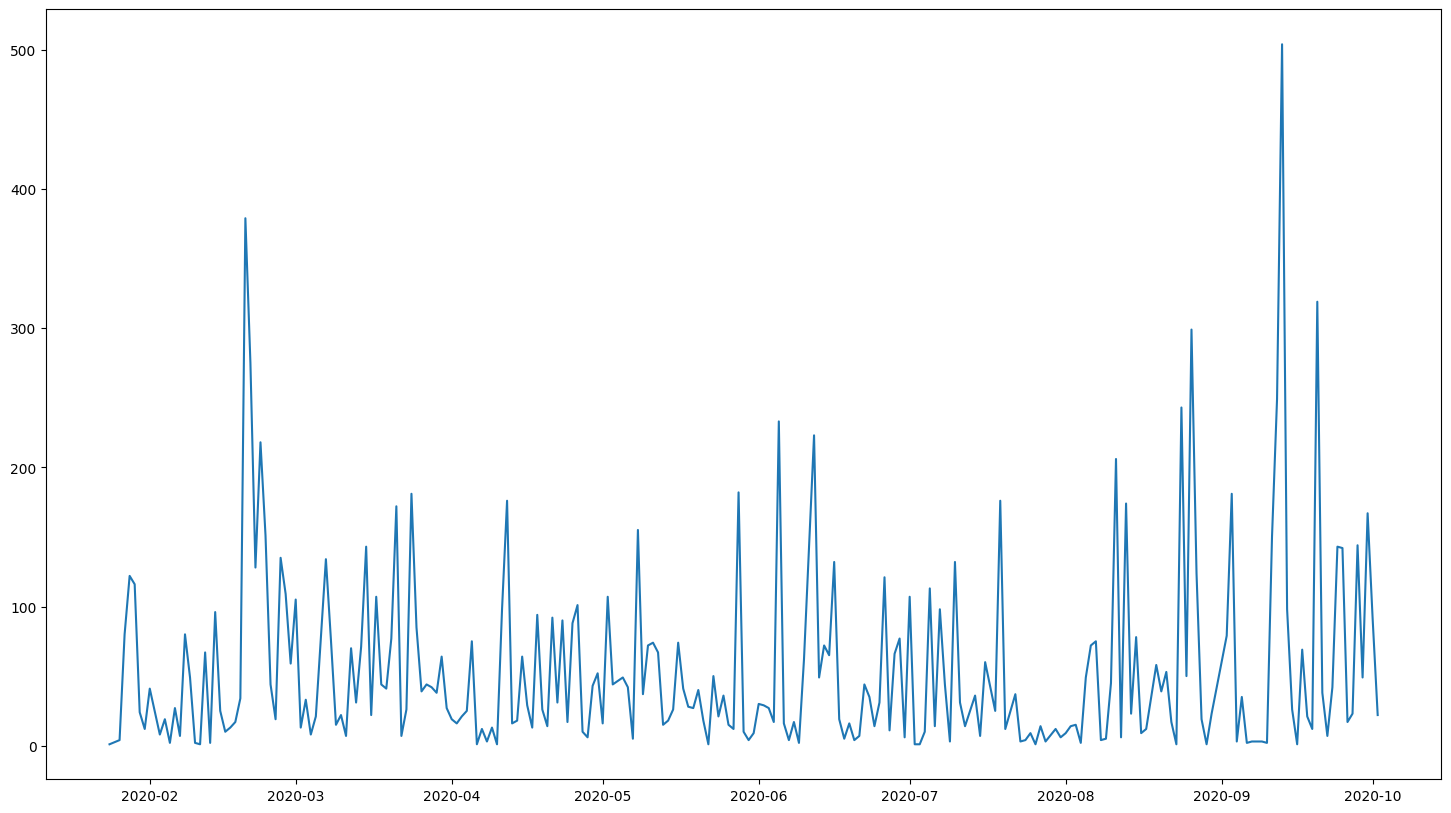

In [54]:
plt.figure(figsize=(18,10))
plt.plot(daily_timeline['only_date'],daily_timeline['message'])

In [55]:
daily_timeline

,only_date,message
0,2020-01-24,1
1,2020-01-26,4
2,2020-01-27,80
3,2020-01-28,122
4,2020-01-29,116
...,...,...
237,2020-09-28,144
238,2020-09-29,49
239,2020-09-30,167
240,2020-10-01,91


In [56]:
df['day_name']=df['date'].dt.day_name()

In [57]:
df['day_name'].value_counts()

Sunday       2568
Thursday     2188
Friday       2156
Saturday     1906
Wednesday    1672
Tuesday      1543
Monday       1469
Name: day_name, dtype: int64

In [59]:
import pandas as pd
grouped_df = df.groupby(['user', 'day_name']).size().reset_index(name='message_count')
print(grouped_df)

                   user   day_name  message_count
0       +91 70208 31915     Friday              2
1       +91 70208 31915   Saturday              3
2       +91 70218 25025     Sunday              6
3       +91 70219 80066     Friday              1
4       +91 70219 80066   Saturday              1
..                  ...        ...            ...
561  group_notification   Saturday             16
562  group_notification     Sunday             28
563  group_notification   Thursday             13
564  group_notification    Tuesday             24
565  group_notification  Wednesday             15

[566 rows x 3 columns]


In [60]:
# Specify the user for which you want to display the message count
target_user = 'Tanay Kamath (TSEC, CS)'

# Filter the DataFrame for the specified user
user_df = grouped_df[grouped_df['user'] == target_user]

# Display the resulting DataFrame
print(user_df)

                        user   day_name  message_count
530  Tanay Kamath (TSEC, CS)     Friday            369
531  Tanay Kamath (TSEC, CS)     Monday            264
532  Tanay Kamath (TSEC, CS)   Saturday            365
533  Tanay Kamath (TSEC, CS)     Sunday            483
534  Tanay Kamath (TSEC, CS)   Thursday            377
535  Tanay Kamath (TSEC, CS)    Tuesday            355
536  Tanay Kamath (TSEC, CS)  Wednesday            315


In [61]:
period=[]
for hour in df[['day_name', 'hour']]['hour']:
    if hour==23:
        period.append(str(hour)+'-'+str('00'))
    elif hour==0:
        period.append(str('00')+'-'+str(hour+1))
    else:
        period.append(str(hour)+'-'+str(hour+1))

In [62]:
df['period']=period
df

,date,user,message,only_date,year,month_num,month,day,day_name,hour,minute,period
0,2020-01-26 16:19:00,group_notification,Messages and calls are end-to-end encrypted. N...,2020-01-26,2020,1,January,26,Sunday,16,19,16-17
1,2020-01-24 20:25:00,group_notification,"Tanay Kamath (TSEC, CS) created group ""CODERS👨...",2020-01-24,2020,1,January,24,Friday,20,25,20-21
2,2020-01-26 17:12:00,group_notification,"+91 96536 93868 removed Saket (TSEC, CS)\n",2020-01-26,2020,1,January,26,Sunday,17,12,17-18
3,2020-01-26 17:13:00,group_notification,"+91 96536 93868 added Saket (TSEC, CS)\n",2020-01-26,2020,1,January,26,Sunday,17,13,17-18
4,2020-01-26 17:20:00,group_notification,+91 96536 93868 left\n,2020-01-26,2020,1,January,26,Sunday,17,20,17-18
...,...,...,...,...,...,...,...,...,...,...,...,...
13497,2020-10-02 02:05:00,"Darshan Rander (TSEC, IT)",MCQs mark kiya\n,2020-10-02,2020,10,October,2,Friday,2,5,2-3
13498,2020-10-02 02:05:00,"Darshan Rander (TSEC, IT)",Sign-in kiya😂😅\n,2020-10-02,2020,10,October,2,Friday,2,5,2-3
13499,2020-10-02 02:11:00,"Tanay Kamath (TSEC, CS)",Incognito se na?\n,2020-10-02,2020,10,October,2,Friday,2,11,2-3
13500,2020-10-02 02:28:00,"Darshan Rander (TSEC, IT)",Yup\n,2020-10-02,2020,10,October,2,Friday,2,28,2-3


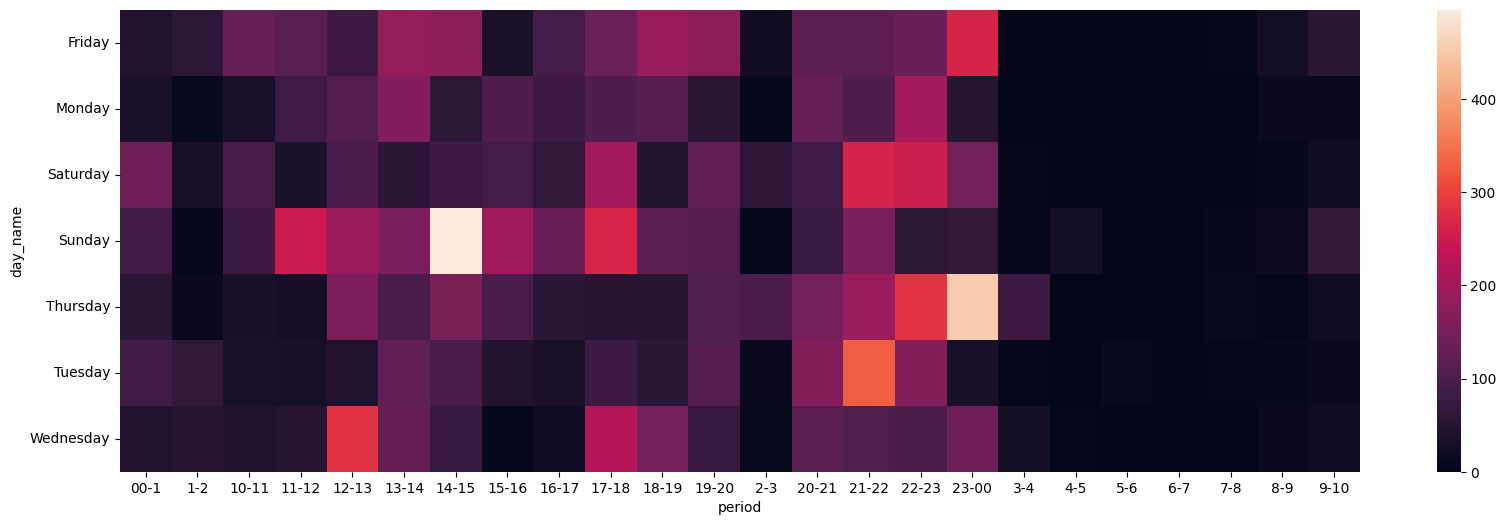

In [63]:
import seaborn as sns
plt.figure(figsize=(20,6))
sns.heatmap(df.pivot_table(index='day_name', columns='period', values='message', aggfunc='count').fillna(0))
plt.yticks(rotation='horizontal')
plt.show()

In [65]:
temp

,date,user,message,only_date,year,month_num,month,day,day_name,hour,minute
7,2020-01-27 19:31:00,+91 96536 93868,Give it a try ....\n,2020-01-27,2020,1,January,27,Monday,19,31
8,2020-01-27 19:31:00,"Dheeraj Lalwani (TSEC, CS)",Alright\n,2020-01-27,2020,1,January,27,Monday,19,31
9,2020-01-27 19:32:00,"Dheeraj Lalwani (TSEC, CS)",We can make this a trend\n,2020-01-27,2020,1,January,27,Monday,19,32
10,2020-01-27 19:32:00,+91 96536 93868,Sure\n,2020-01-27,2020,1,January,27,Monday,19,32
11,2020-01-27 19:32:00,"Dheeraj Lalwani (TSEC, CS)",Everyday a new challenge\n,2020-01-27,2020,1,January,27,Monday,19,32
...,...,...,...,...,...,...,...,...,...,...,...
13497,2020-10-02 02:05:00,"Darshan Rander (TSEC, IT)",MCQs mark kiya\n,2020-10-02,2020,10,October,2,Friday,2,5
13498,2020-10-02 02:05:00,"Darshan Rander (TSEC, IT)",Sign-in kiya😂😅\n,2020-10-02,2020,10,October,2,Friday,2,5
13499,2020-10-02 02:11:00,"Tanay Kamath (TSEC, CS)",Incognito se na?\n,2020-10-02,2020,10,October,2,Friday,2,11
13500,2020-10-02 02:28:00,"Darshan Rander (TSEC, IT)",Yup\n,2020-10-02,2020,10,October,2,Friday,2,28


In [67]:
df_demo=df[df['user']=='Tanay Kamath (TSEC, CS)']
df_demo.reset_index()

,index,date,user,message,only_date,year,month_num,month,day,day_name,hour,minute,period
0,22,2020-01-27 21:41:00,"Tanay Kamath (TSEC, CS)",Can we store * in a char variable?\n,2020-01-27,2020,1,January,27,Monday,21,41,21-22
1,24,2020-01-27 21:42:00,"Tanay Kamath (TSEC, CS)",Nope\n,2020-01-27,2020,1,January,27,Monday,21,42,21-22
2,25,2020-01-27 21:42:00,"Tanay Kamath (TSEC, CS)",Ofc not\n,2020-01-27,2020,1,January,27,Monday,21,42,21-22
3,27,2020-01-27 21:42:00,"Tanay Kamath (TSEC, CS)",Then why will I even store it in a variable\n,2020-01-27,2020,1,January,27,Monday,21,42,21-22
4,29,2020-01-27 21:42:00,"Tanay Kamath (TSEC, CS)",Ohk\n,2020-01-27,2020,1,January,27,Monday,21,42,21-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2523,13480,2020-10-02 01:25:00,"Tanay Kamath (TSEC, CS)",I got the GCP wale credits but didn't get any ...,2020-10-02,2020,10,October,2,Friday,1,25,1-2
2524,13492,2020-10-02 01:52:00,"Tanay Kamath (TSEC, CS)",Amen\n,2020-10-02,2020,10,October,2,Friday,1,52,1-2
2525,13494,2020-10-02 01:58:00,"Tanay Kamath (TSEC, CS)",....\n,2020-10-02,2020,10,October,2,Friday,1,58,1-2
2526,13495,2020-10-02 01:58:00,"Tanay Kamath (TSEC, CS)",Bhai lab pe 5-10 mins spend kiye na?\n,2020-10-02,2020,10,October,2,Friday,1,58,1-2


In [70]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()
df_demo.loc[:, 'sentiment'] = df_demo['message'].apply(lambda x: sid.polarity_scores(x)['compound'])
df_demo

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\suraj\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
C:\Users\suraj\AppData\Local\Temp\ipykernel_13980\1393304850.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_demo.loc[:, 'sentiment'] = df_demo['message'].apply(lambda x: sid.polarity_scores(x)['compound'])


,date,user,message,only_date,year,month_num,month,day,day_name,hour,minute,period,sentiment
22,2020-01-27 21:41:00,"Tanay Kamath (TSEC, CS)",Can we store * in a char variable?\n,2020-01-27,2020,1,January,27,Monday,21,41,21-22,0.0000
24,2020-01-27 21:42:00,"Tanay Kamath (TSEC, CS)",Nope\n,2020-01-27,2020,1,January,27,Monday,21,42,21-22,0.0000
25,2020-01-27 21:42:00,"Tanay Kamath (TSEC, CS)",Ofc not\n,2020-01-27,2020,1,January,27,Monday,21,42,21-22,0.0000
27,2020-01-27 21:42:00,"Tanay Kamath (TSEC, CS)",Then why will I even store it in a variable\n,2020-01-27,2020,1,January,27,Monday,21,42,21-22,0.0000
29,2020-01-27 21:42:00,"Tanay Kamath (TSEC, CS)",Ohk\n,2020-01-27,2020,1,January,27,Monday,21,42,21-22,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13480,2020-10-02 01:25:00,"Tanay Kamath (TSEC, CS)",I got the GCP wale credits but didn't get any ...,2020-10-02,2020,10,October,2,Friday,1,25,1-2,0.4497
13492,2020-10-02 01:52:00,"Tanay Kamath (TSEC, CS)",Amen\n,2020-10-02,2020,10,October,2,Friday,1,52,1-2,0.0000
13494,2020-10-02 01:58:00,"Tanay Kamath (TSEC, CS)",....\n,2020-10-02,2020,10,October,2,Friday,1,58,1-2,0.0000
13495,2020-10-02 01:58:00,"Tanay Kamath (TSEC, CS)",Bhai lab pe 5-10 mins spend kiye na?\n,2020-10-02,2020,10,October,2,Friday,1,58,1-2,0.0000


In [73]:
df_demo['sentiment_category'] = df_demo['sentiment'].apply(lambda x: 'positive' if x > 0.1 else ('negative' if x < -0.1 else 'neutral'))
df_demo

C:\Users\suraj\AppData\Local\Temp\ipykernel_13980\1528892108.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_demo['sentiment_category'] = df_demo['sentiment'].apply(lambda x: 'positive' if x > 0.1 else ('negative' if x < -0.1 else 'neutral'))


,date,user,message,only_date,year,month_num,month,day,day_name,hour,minute,period,sentiment,sentiment_category
22,2020-01-27 21:41:00,"Tanay Kamath (TSEC, CS)",Can we store * in a char variable?\n,2020-01-27,2020,1,January,27,Monday,21,41,21-22,0.0000,neutral
24,2020-01-27 21:42:00,"Tanay Kamath (TSEC, CS)",Nope\n,2020-01-27,2020,1,January,27,Monday,21,42,21-22,0.0000,neutral
25,2020-01-27 21:42:00,"Tanay Kamath (TSEC, CS)",Ofc not\n,2020-01-27,2020,1,January,27,Monday,21,42,21-22,0.0000,neutral
27,2020-01-27 21:42:00,"Tanay Kamath (TSEC, CS)",Then why will I even store it in a variable\n,2020-01-27,2020,1,January,27,Monday,21,42,21-22,0.0000,neutral
29,2020-01-27 21:42:00,"Tanay Kamath (TSEC, CS)",Ohk\n,2020-01-27,2020,1,January,27,Monday,21,42,21-22,0.0000,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13480,2020-10-02 01:25:00,"Tanay Kamath (TSEC, CS)",I got the GCP wale credits but didn't get any ...,2020-10-02,2020,10,October,2,Friday,1,25,1-2,0.4497,positive
13492,2020-10-02 01:52:00,"Tanay Kamath (TSEC, CS)",Amen\n,2020-10-02,2020,10,October,2,Friday,1,52,1-2,0.0000,neutral
13494,2020-10-02 01:58:00,"Tanay Kamath (TSEC, CS)",....\n,2020-10-02,2020,10,October,2,Friday,1,58,1-2,0.0000,neutral
13495,2020-10-02 01:58:00,"Tanay Kamath (TSEC, CS)",Bhai lab pe 5-10 mins spend kiye na?\n,2020-10-02,2020,10,October,2,Friday,1,58,1-2,0.0000,neutral


In [74]:
df_demo['sentiment_category'].value_counts()

neutral     1721
positive     604
negative     203
Name: sentiment_category, dtype: int64

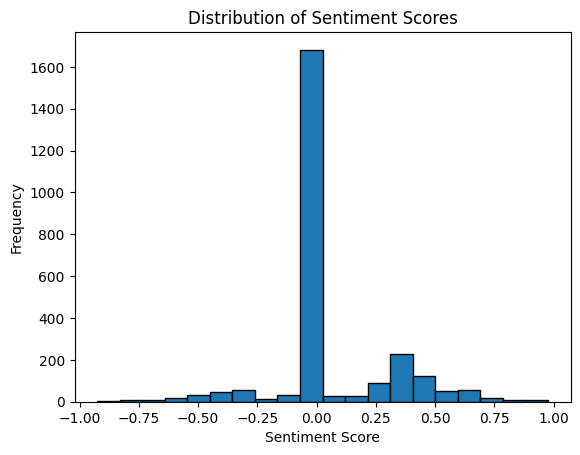

In [75]:
import matplotlib.pyplot as plt

# Histogram of sentiment scores
plt.hist(df_demo['sentiment'], bins=20, edgecolor='black')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Scores')
plt.show()

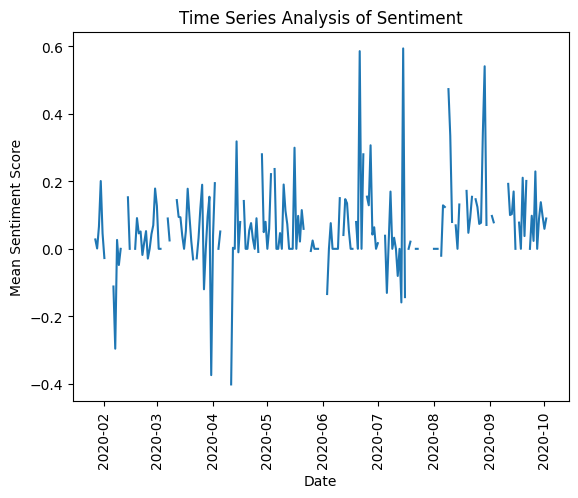

In [83]:
# # Assuming df_demo has a 'date' column
# df_demo['date'] = pd.to_datetime(df_demo['date'])
# df_demo.set_index('date', inplace=True)

# Resample to daily frequency and calculate mean sentiment for each day
daily_sentiment = df_demo['sentiment'].resample('D').mean()

# Plot time series of mean sentiment
plt.plot(daily_sentiment)
plt.xlabel('Date')
plt.ylabel('Mean Sentiment Score')
plt.title('Time Series Analysis of Sentiment')
plt.xticks(rotation='vertical')
plt.show()

In [86]:
from googletrans import Translator
translator = Translator()

# Translate each message and create a new 'translated_message' column
df_demo['translated_message'] = df_demo['message'].apply(lambda x: translator.translate(x, dest='ja').text)

# Display the resulting DataFrame with translated messages
print(df_demo)

KeyboardInterrupt: 

In [95]:
df_small=pd.DataFrame(df_demo['message'].head(9))
df_small

,message
date,
2020-01-27 21:41:00,Can we store * in a char variable?\n
2020-01-27 21:42:00,Nope\n
2020-01-27 21:42:00,Ofc not\n
2020-01-27 21:42:00,Then why will I even store it in a variable\n
2020-01-27 21:42:00,Ohk\n
2020-01-27 21:48:00,Arre ik\n
2020-01-27 21:49:00,Re\n
2020-01-27 22:16:00,<Media omitted>\n
2020-01-27 22:16:00,<Media omitted>\n


In [98]:
translator = Translator()

# Translate each message and create a new 'translated_message' column
df_small['translated_message'] = df_small['message'].apply(lambda x: translator.translate(x, dest='ja').text)

# Display the resulting DataFrame with translated messages
print(df_small)

                                                           message  \
date                                                                 
2020-01-27 21:41:00           Can we store * in a char variable?\n   
2020-01-27 21:42:00                                         Nope\n   
2020-01-27 21:42:00                                      Ofc not\n   
2020-01-27 21:42:00  Then why will I even store it in a variable\n   
2020-01-27 21:42:00                                          Ohk\n   
2020-01-27 21:48:00                                      Arre ik\n   
2020-01-27 21:49:00                                           Re\n   
2020-01-27 22:16:00                              <Media omitted>\n   
2020-01-27 22:16:00                              <Media omitted>\n   

                      translated_message  
date                                      
2020-01-27 21:41:00  * char変数に *保存できますか？  
2020-01-27 21:42:00                  いいえ  
2020-01-27 21:42:00           OFCではありません  
2020-01-27 21: